## Predicting Song Popularity by Analyzing Spotify Data

The aim of this notebook is to analyze spotify data to predict song popularity

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error


import time
import seaborn as sns
from matplotlib import pyplot as plt

### Loading the data and making general observations
First, we load the data in

In [2]:
data = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

Let's view the head and tail and see if we can observe anything.

In [3]:
data.head(50)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0


In [4]:
data.tail(50)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
130613,Felipe Araújo,5EKHbW7mXcAR4hCyS3YXjb,Atrasadinha - Ao Vivo,0.498000,0.676,172767,0.8440,0.000000,7,0.8660,-3.396,1,0.1090,159.969,4,0.7160,83
130614,Isabela Moner,0YUlezPOv2Y5OiN3WZaZaW,I'll Stay - from Instant Family,0.023000,0.544,207760,0.5730,0.000000,1,0.1030,-6.936,1,0.0297,94.143,4,0.3490,59
130615,Ninja Sex Party,19bZB2AbnfqhLzgO0q9TpC,Orgy for One,0.064800,0.578,203150,0.9100,0.000000,2,0.3110,-2.307,1,0.0637,133.055,4,0.8230,51
130616,Metro Boomin,2VCXaStTlLpvxJh3sqA0Hr,Borrowed Love - Instrumental,0.444000,0.624,230240,0.2910,0.877000,11,0.2390,-13.459,0,0.0996,194.011,4,0.2510,48
130617,Emmanuelle Rimbaud,3Le8dA7PwImsZxRgEnwnt6,Hopes and Dreams,0.980000,0.298,164649,0.0462,0.941000,8,0.1250,-28.427,1,0.0400,61.299,4,0.2800,61
130618,Elley Duhé,60uwjx3zc93kVyUtNxVOsi,SAVIOR,0.045900,0.846,203560,0.6920,0.000000,9,0.1270,-3.303,1,0.0623,123.950,4,0.2280,46
130619,khai dreams,6G4WyEppR26jbZGyM5tB7d,All I Need,0.508000,0.760,147967,0.5590,0.000000,11,0.3670,-7.274,0,0.4990,74.954,4,0.4800,53
130620,Nick Mulvey,7tJHvRoGvkckZkZk5ORUot,In Your Hands - Single Version,0.605000,0.605,230164,0.5980,0.009990,3,0.1570,-9.263,1,0.0323,105.945,4,0.7530,61
130621,Felguk,0ySn4jIZDiQfDN5R1WlUvh,Pretty Baby,0.023800,0.658,201848,0.9130,0.623000,11,0.0747,-4.890,0,0.0509,123.998,4,0.7110,40
130622,Peach Tree Rascals,1c57sAKlEMZyDXE89RgUWz,Someday,0.691000,0.494,354873,0.3440,0.112000,2,0.1260,-9.379,1,0.0532,113.822,3,0.3290,50


We probably don't need the track id, so we should drop it.

In [5]:
data = data.drop(['track_id'], axis = 1)

Let's get a description of the data to get a feel for the range and type of value. After that, we can observe the shape to see how much data we actually have, and use the info() function in pandas to see if there are any null values in any of the columns of our dataset.

In [6]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [7]:
data.shape

(130663, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 16 columns):
artist_name         130663 non-null object
track_name          130663 non-null object
acousticness        130663 non-null float64
danceability        130663 non-null float64
duration_ms         130663 non-null int64
energy              130663 non-null float64
instrumentalness    130663 non-null float64
key                 130663 non-null int64
liveness            130663 non-null float64
loudness            130663 non-null float64
mode                130663 non-null int64
speechiness         130663 non-null float64
tempo               130663 non-null float64
time_signature      130663 non-null int64
valence             130663 non-null float64
popularity          130663 non-null int64
dtypes: float64(9), int64(5), object(2)
memory usage: 16.0+ MB


None of the columns are null, which is pretty convenient.



### Brief Explanation and Analysis of some of the Columns

These explanations are taken directly from the Spotify Website
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

##### Acousticness: 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

##### Danceability: 
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

##### Duration_ms:
It is the duration of the track in milliseconds. We might want to convert this to seconds later.

##### Energy: 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Loudness, timbre, onset rate and general entropy are some of the features contributing to this. 

##### Instrumentalness:
Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

##### Key:
The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation.
https://en.wikipedia.org/wiki/Pitch_class
Note: If there was no key detected, a value of -1 was assigned.

##### Liveness: 
Detects whether the song was played live by looking for audience in the background. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

##### Loudness:
The overall loudness of a track in decibels (dB), averaged across the entire track. Loudness directly relates to amplitude. Values typical range between -60 and 0 db.  

##### Mode:
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

##### Speechiness:
Speechiness detects the presence of spoken words in a track. Values > 0.66 indicate that the song pretty much contains spoken words everywhere. Values < 0.33 indicate that the track is mostly music and represent non-speech like sounds.

##### Tempo: 
The overall estimated tempo of a track in beats per minute (BPM). Tempo is the speed or pace of a given piece and derives directly from the average beat duration.

##### Time_Signature:
The time signature is a notational convention used in Western musical notation to specify how many beats are contained in each measure, and which note value is equivalent to a beat. 

##### Valence:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy), while tracks with low valence sound more negative (eg. sad) 

##### Popularity:
A popularity score between 0 to 100, describing how popular a track is.

### Modifying columns and rows

The time in milliseconds isn't that readable, so lets convert it to seconds.

In [9]:
data['duration_seconds'] = data['duration_ms'] / 1000
data[['artist_name', 'track_name', 'duration_seconds']].head()

,artist_name,track_name,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238.373
1,YG,BAND DRUM (feat. A$AP Rocky),214.800
2,R3HAB,Radio Silence,138.913
3,Chris Cooq,Lactose,125.381
4,Chris Cooq,Same - Original mix,124.016


In [10]:
data = data.drop(['duration_ms'], axis = 1)
data.head()

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,238.373
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,214.800
2,R3HAB,Radio Silence,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,138.913
3,Chris Cooq,Lactose,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,125.381
4,Chris Cooq,Same - Original mix,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,124.016


Let's see if there are any duplicates.

In [11]:
len(data) - len(data.drop_duplicates())

0

There are no duplicates, so we don't need to drop any rows.

### Statistical Analysis

Let's see how popularity relates to various features. This will give a general idea about what features might matter the most.

First, we'll see how **popularity** relates to **danceability.**

In [12]:
color_list = ['#8ec6ff', 'red']
color_palette = sns.color_palette(color_list)
sns.set_palette(color_palette)
sns.set_style('darkgrid')

In [13]:
highly_popular_dance = data[data['popularity'] > 50]['danceability']
low_popular_dance = data[data['popularity'] <= 50]['danceability']

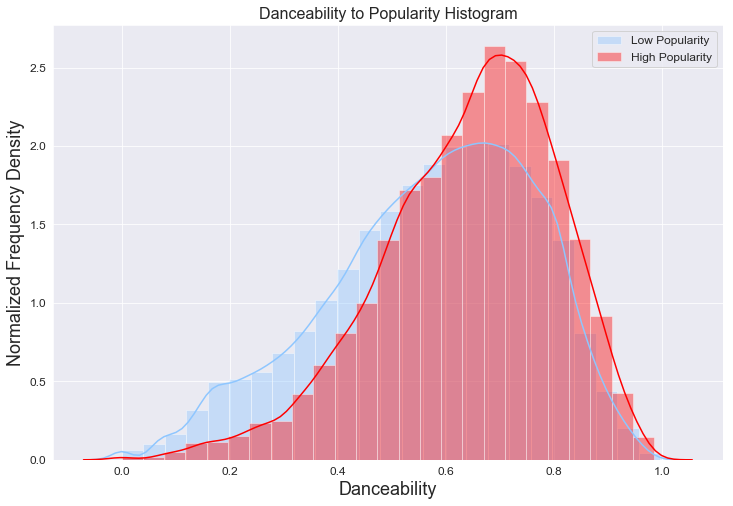

In [14]:
fig = plt.figure(figsize = (12, 8))
plt.title("Danceability to Popularity Histogram", fontsize=16)
#highly_popular_dance.hist(alpha = 1, bins = 15, label = 'High Popularity')
#low_popular_dance.hist(alpha = 0.5, bins = 15, label = 'Low Popularity')

sns.distplot(low_popular_dance, label = 'Low Popularity', bins = 25)
sns.distplot(highly_popular_dance, label = 'High Popularity', bins = 25)

plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Danceability', fontsize=18)
plt.ylabel('Normalized Frequency Density', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)

A danceability of about 0.7 seems to be the best spot for highly popular songs. 

Next, let's look at **Popularity vs Duration** of a song.

Text(0, 0.5, 'Popularity')

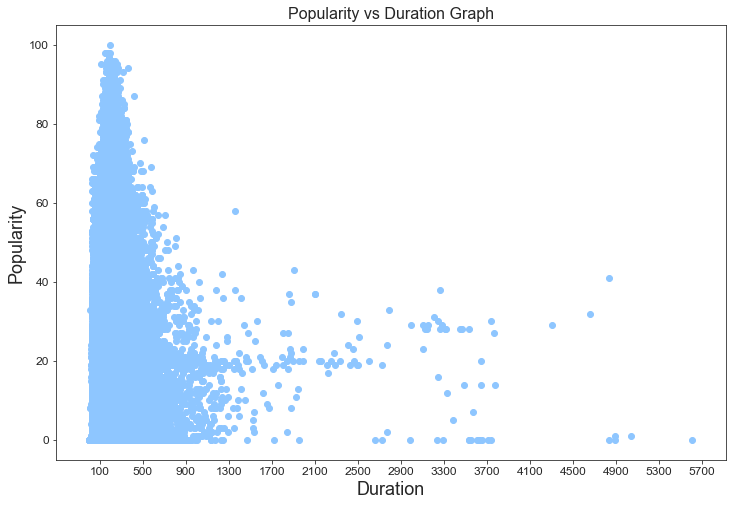

In [15]:
color_palette = sns.color_palette(color_list)
sns.set_palette(color_palette)
sns.set_style('ticks')
fig2 = plt.figure(figsize = (12, 8))
plt.xticks(np.arange(100, 6000, 400))

plt.title("Popularity vs Duration Graph", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(data['duration_seconds'],data['popularity'])
plt.xlabel('Duration', fontsize=18)
plt.ylabel('Popularity', fontsize=18)

In general, songs around 200 seconds to 300 seconds (3.5 to 5 minutes) are the most popular. Songs that are a lot less than that or a lot more are much lower in popularity, although there is a sudden surge around the 3000 to 4000 second mark, possibly podcasts?

It would be interesting to see which **key** is most popular/most liked. Let's make a histogram for it.

Text(0, 0.5, 'Normalized Frequency')

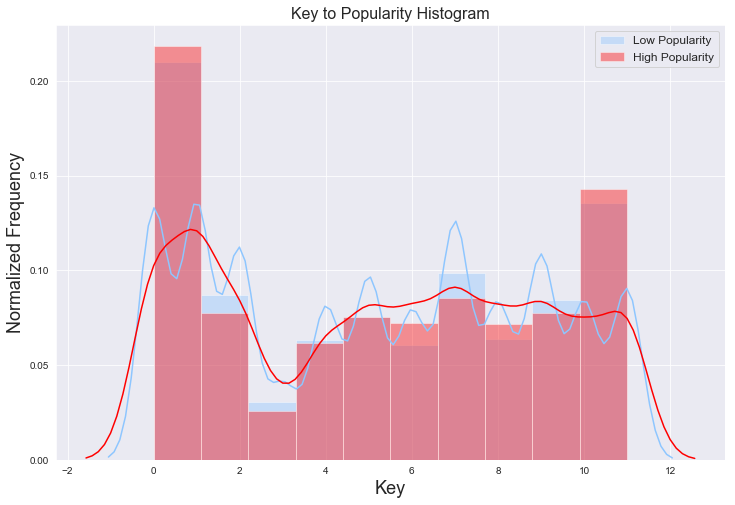

In [16]:
color_list = ['#8ec6ff', 'red']
sns.set_palette(color_list)
sns.set_style('darkgrid')
highly_popular_key = data[data['popularity'] > 50]['key']
low_popular_key = data[data['popularity'] <= 50]['key']

fig3 = plt.figure(figsize = (12, 8))
plt.title("Key to Popularity Histogram", fontsize = 16)


#low_popular_key.hist(alpha = 0.5, bins = 15, label = 'Low Popularity')
#highly_popular_key.hist(alpha = 0.5, bins = 15, label = 'High Popularity')

sns.distplot(low_popular_key, label = 'Low Popularity', bins = 10)
sns.distplot(highly_popular_key, label = 'High Popularity', bins = 10)

plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Key', fontsize = 18)
plt.ylabel('Normalized Frequency', fontsize = 18)

Notice how keys at the extremes, 0 and 10, seem to be better for highly popular values

**Speechiness vs Popularity**

Text(0, 0.5, 'popularity')

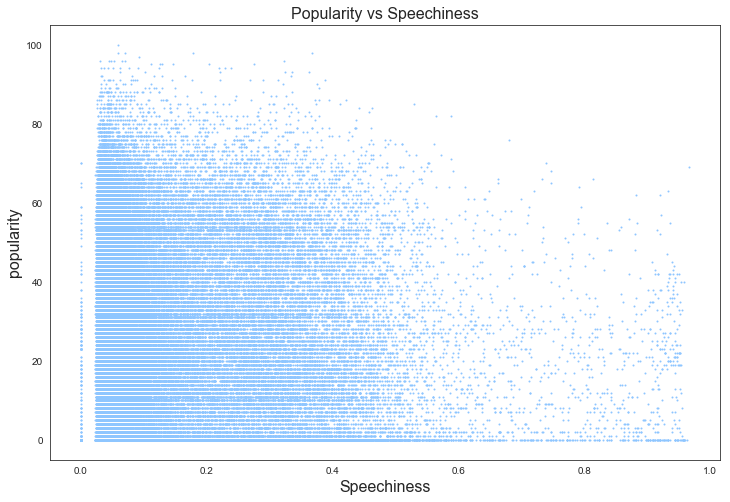

In [17]:
color_list = ['#8ec6ff', 'red']
color_palette = sns.color_palette(color_list)
sns.set_palette(color_palette)
sns.set_style('white')
fig4 = plt.figure(figsize = (12, 8))
plt.scatter(data['speechiness'],data['popularity'],s=1)
plt.title("Popularity vs Speechiness", fontsize = 16)
plt.xlabel('Speechiness', fontsize = 16)
plt.ylabel('popularity', fontsize = 16)

Very very high speechiness does not seem to ever be very popular. Speechiness of about 10% seems to be a good amount for popular songs.

**Tempo and Popularity**

Text(0, 0.5, 'Normalized Frequency')

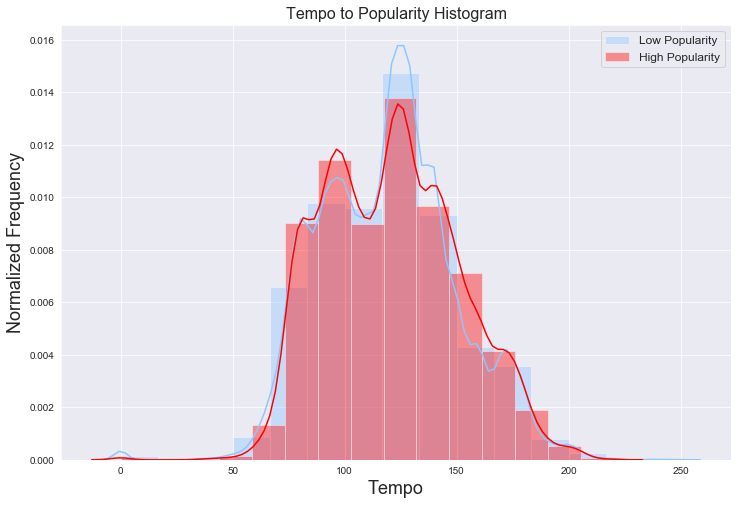

In [18]:
highly_popular_tempo = data[data['popularity'] > 50]['tempo']
low_popular_tempo = data[data['popularity'] <= 50]['tempo']
sns.set_style('darkgrid')
fig5 = plt.figure(figsize = (12, 8))
plt.title("Tempo to Popularity Histogram", fontsize = 16)
#low_popular_tempo.hist(alpha = 0.7, bins = 15, label = 'Low Popularity')
#highly_popular_tempo.hist(alpha = 0.7, bins = 15, label = 'High Popularity')
sns.distplot(low_popular_tempo, label = 'Low Popularity', bins = 15)
sns.distplot(highly_popular_tempo, label = 'High Popularity', bins = 15)
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Tempo', fontsize = 18)
plt.ylabel('Normalized Frequency', fontsize = 18)

It is clear that a tempo range of around 70-130 seems to be doing well in terms of most popularity.

**Modality vs Popularity**

Text(0, 0.5, 'Normalized Frequency')

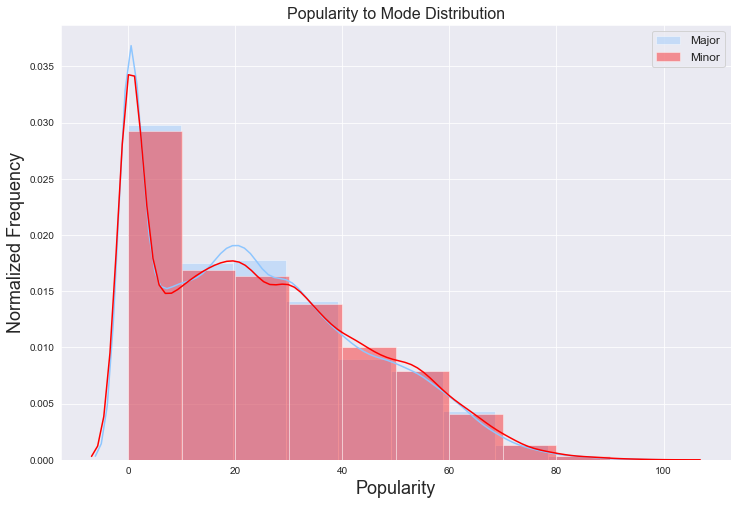

In [19]:
major = data[data['mode'] == 1]['popularity']
minor = data[data['mode'] == 0]['popularity']

fig6 = plt.figure(figsize = (12, 8))
plt.title("Popularity to Mode Distribution", fontsize = 16)
#major.hist(alpha = 0.7, bins = 15, label = 'Major')
#minor.hist(alpha = 0.7, bins = 15, label = 'Minor')

sns.distplot(major, label = 'Major', bins = 10)
sns.distplot(minor, label = 'Minor', bins = 10)
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('Popularity', fontsize = 18)
plt.ylabel('Normalized Frequency', fontsize = 18)

**Popularity vs Valence**

Valence determines the happiness or sadness of a song. Let's see if we can find any particular trends here.

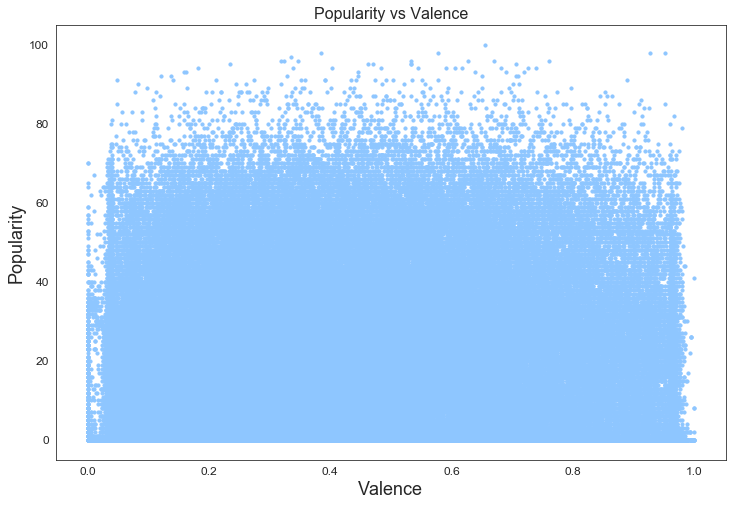

In [20]:
fig6 = plt.figure(figsize = (12, 8))
sns.set_style('white')
plt.scatter(data['valence'],data['popularity'], s = 10)
plt.title("Popularity vs Valence", fontsize = 16)
plt.xlabel('Valence', fontsize = 18)
plt.ylabel('Popularity', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=12)

Looks like people like all types of songs, whether it's happy or sad, which makes sense.

**Popularity Vs Loudness**

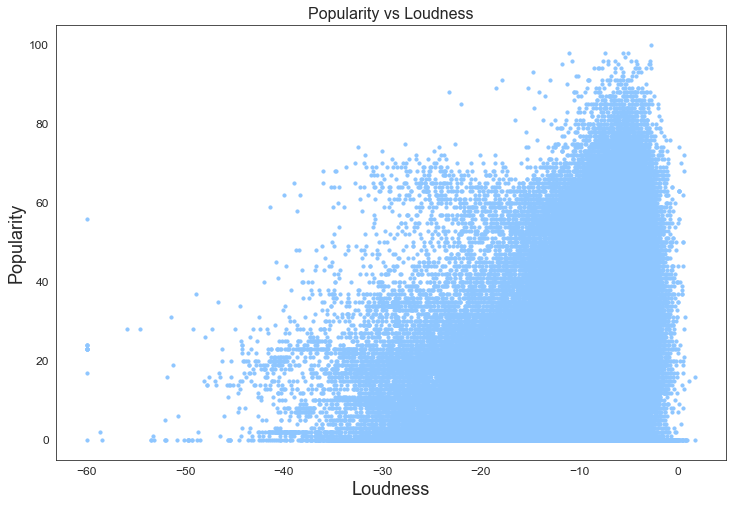

In [21]:
fig7 = plt.figure(figsize = (12, 8))
plt.scatter(data['loudness'],data['popularity'], s = 10)
plt.title("Popularity vs Loudness", fontsize = 16)
plt.xlabel('Loudness', fontsize = 18)
plt.ylabel('Popularity', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=12)

We see an interesting trend where music with higher loudness seems to be more popular.

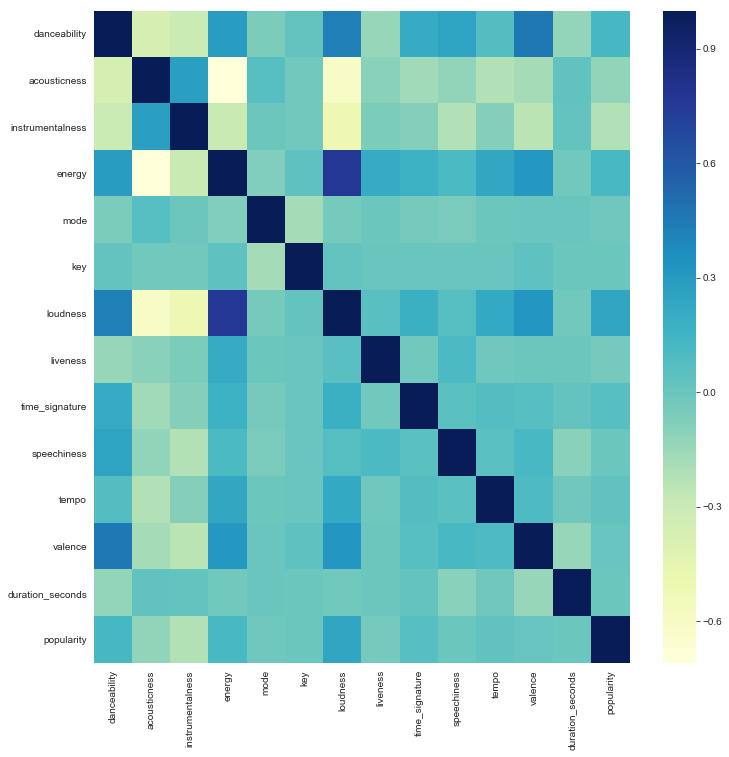

In [22]:
fig8 = plt.figure(figsize = (12, 12))
data_small = data[["danceability", "acousticness", "instrumentalness", "energy", "mode", "key", "loudness", "liveness", "time_signature", "speechiness", "tempo", "valence", "duration_seconds", "popularity"]]
corr = data_small.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu")

Most prominent correlations:

**Positive:** 

Loudness and Energy

Danceability and loudness

Danceability and valence

**Negative:**

Acousticness and loudness

Acousticness and energy

Loudness and instrumentalness

If we're looking at popularity, there aren't many correlations, but loudness seems to be the most positively correlated feature.


### Predicting popularity by testing out ML Algorithms

So far, we've cleaned our data and looked a little bit at the statistics and how our features relate to popularity. Now it's time to apply some Machine Learning algorithms to predict what we want.

First, let's perform a train_test_split on our data

In [23]:
train, test = train_test_split(data, test_size = 0.2)

Let's calculate the baseline we want to beat. The baseline is the error if we predicted all the popularity values as the average value.

In [24]:
baseline_pred = np.mean(data['popularity'])
baseline_errors =  abs(test["popularity"] - baseline_pred)
print('Baseline error: ', np.mean(baseline_errors))

Baseline error:  16.379929291900655


We want to get an error below this number. Let's start out with Linear Regression

### Linear Regression

In [25]:
data.head()

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,238.373
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,214.800
2,R3HAB,Radio Silence,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,138.913
3,Chris Cooq,Lactose,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,125.381
4,Chris Cooq,Same - Original mix,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,124.016


In [26]:
regression = LinearRegression()

In [27]:
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity"]

x_test = test[features]
y_test = test["popularity"]

In [28]:
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred = regression.predict(x_test)
mean_absolute_error(y_test, y_pred)

15.561184101706944

This is a reasonable start. It's better than the baseline error, so we've already improved from the baseline approach.

### Random Forests

Let's use a Random Forest regressor to predict our values.

In [30]:
features = np.array(data[["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]])
predict = np.array(data['popularity'])
x_train, x_test, y_train, y_test = train_test_split(features, predict, test_size = 0.2, random_state = 42)
n_estimators = 100
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, warm_start=True, random_state=42)

start_time = time.time()
rf.fit(x_train, y_train);
end_time = time.time()

In [31]:
print("Time Elapsed for %d estimators: %d seconds" % (n_estimators, (end_time - start_time)))

Time Elapsed for 100 estimators: 51 seconds


In [32]:
y_pred = rf.predict(x_test)

In [33]:
mean_absolute_error(y_test, y_pred)

14.605743545348892

The mean absolute error is less than the error for linear regression, so we've made a little improvement here!

### K-Nearest Neighbors

Next, we'll try K-Nearest Neighbors

In [34]:
train, test = train_test_split(data, test_size = 0.2)

In [35]:
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity"]

x_test = test[features]
y_test = test["popularity"]

In [36]:
KNR = KNeighborsRegressor(100)
KNR.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=100, p=2,
          weights='uniform')

In [37]:
y_pred = KNR.predict(x_test)

In [38]:
mean_absolute_error(y_test, y_pred)

15.563157693337926

It performed similar to Linear Regression, but Random Forest worked better than both. 

Let's try Gradient Boosting Regressors next

### Gradient Boosting Regressors

In [39]:
features = np.array(data[["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]])
predict = np.array(data['popularity'])
x_train, x_test, y_train, y_test = train_test_split(features, predict, test_size = 0.2, random_state = 42)
n_estimators = 100
gb = GradientBoostingRegressor(n_estimators=500, random_state=42)
start_time = time.time()
gb.fit(x_train, y_train)
end_time = time.time()
print("Time Elapsed for %d estimators: %d seconds" % (n_estimators, (end_time - start_time)))

Time Elapsed for 100 estimators: 63 seconds


In [40]:
y_pred=gb.predict(x_test)
mean_absolute_error(y_test, y_pred)

14.807974449066545

Almost as good as random forests. Hopefully we can try Neural Networks next and see if we get better results.

### A simple Neural Network - Multilayer perceptron

Scikit learn isn't the best for Deep learning, but it's worth seeing how well it does. If we don't get good results, we can try other libraries adapted for deep learning like PyTorch

In [79]:
# Chose a larger split ratio because deep learning needs more data.
train, test = train_test_split(data, test_size = 0.04)
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity"]

x_test = test[features]
y_test = test["popularity"]

In [80]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(x_train)  
x_train = scaler.transform(x_train)  

x_test = scaler.transform(x_test)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [84]:

nn = MLPRegressor(activation='relu', hidden_layer_sizes=(13,13,13,13), max_iter=50000, momentum=0.9, verbose = 'true')
nn.fit(x_train, y_train)

Iteration 1, loss = 261.97523241
Iteration 2, loss = 174.75694582
Iteration 3, loss = 173.70559815
Iteration 4, loss = 173.19154933
Iteration 5, loss = 172.76175059
Iteration 6, loss = 172.19353590
Iteration 7, loss = 171.60944874
Iteration 8, loss = 171.17105486
Iteration 9, loss = 170.84894608
Iteration 10, loss = 170.58133681
Iteration 11, loss = 170.35672742
Iteration 12, loss = 170.13794138
Iteration 13, loss = 169.89566288
Iteration 14, loss = 169.80212347
Iteration 15, loss = 169.64597295
Iteration 16, loss = 169.55250604
Iteration 17, loss = 169.51293608
Iteration 18, loss = 169.34693459
Iteration 19, loss = 169.27579098
Iteration 20, loss = 169.21820876
Iteration 21, loss = 169.04577191
Iteration 22, loss = 168.99266780
Iteration 23, loss = 168.85946274
Iteration 24, loss = 168.81319621
Iteration 25, loss = 168.67942924
Iteration 26, loss = 168.63725731
Iteration 27, loss = 168.55576181
Iteration 28, loss = 168.50929993
Iteration 29, loss = 168.39975883
Iteration 30, loss = 16

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose='true', warm_start=False)

In [85]:
y_pred = nn.predict(x_test)

In [86]:
mean_absolute_error(y_test, y_pred)

14.715679438378084

Performed reasonable, not better than Random Forests, but close. Maybe with some more parameter tuning, Neural Networks would be the best approach.

Overall, our best model isn't way off from the actual value, but of course it can be improved.